# Tutorial to run HOD models
Should work under cosmodesi 2025_03 environment 

In [1]:
from HODDIES import HOD

In [4]:
import HODDIES
HODDIES.__file__

'/global/homes/a/arocher/.local/lib/python3.10/site-packages/HODDIES/__init__.py'

# Using abacus simulation at NERSC

In [ ]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml

HOD_obj= HOD(path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')



Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z1.100 ...
Done took 00:00:18
Compute columns...


In [4]:
# All parameters from the parameter file are set here
hcat = HOD_obj.hcat

# Using a custom halo catalog

In [14]:
# Initialise the HOD instance with a Catalog from mpytools. 
from mpytools import Catalog
import numpy as np

if isinstance(hcat, Catalog):
    print(hcat)
    HOD_obj= HOD(hcat_file=hcat, boxsize=1000)

# Initialise the HOD instance with a python dictonnary. 
hcat_dict = hcat.to_dict()
if isinstance(hcat_dict, dict):
    print(hcat_dict)
    HOD_obj= HOD(hcat_file=hcat_dict, boxsize=1000)

# Initialise the HOD instance with a structured array. 
hcat_np = hcat.to_array()
if isinstance(hcat_np, np.ndarray):
    print(hcat_np)
    HOD_obj= HOD(hcat_file=hcat_np, boxsize=1000)

Catalog(csize=48043269, size=48043269, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id'])
Set number of threads to 32
Halo catalog initialized with boxsize of lenght 1000
{'x': array([-499.72495, -499.72513, -499.6687 , ...,  499.32043,  499.13632,
        499.389  ], dtype=float32), 'y': array([ 499.90094,  499.87994, -499.5753 , ...,  499.00482,  499.86328,
        499.03714], dtype=float32), 'z': array([-470.69162, -470.45377, -467.98877, ...,  442.4344 ,  447.2017 ,
        452.19086], dtype=float32), 'vx': array([116.1108  , 137.5257  ,  75.49584 , ...,  93.29314 , 105.938385,
       100.09049 ], dtype=float32), 'vy': array([129.66151 ,  97.65298 ,  16.432905, ..., 575.13635 , 360.43155 ,
       190.05875 ], dtype=float32), 'vz': array([-164.83882, -329.58643, -414.9023 , ..., -157.82863, -352.50104,
       -188.4726 ], dtype=float32), 'Rs': array([38.509262, 20.140064, 30.228575, ..., 37.82191 , 21.790926,
       27.28062 ], dtype=flo

In [15]:
# You can define different tracers 
print('Tracers considered', HOD_obj.args['tracers'])

# You can define different tracers 
print(f"HOD model for {HOD_obj.args['tracers'][0]}: {HOD_obj.args[HOD_obj.args['tracers'][0]]['HOD_model']}")
print(f"HOD model for {HOD_obj.args['tracers'][1]}: {HOD_obj.args[HOD_obj.args['tracers'][1]]['HOD_model']}")

#  All HOD model for central galaxies are define in https://arxiv.org/abs/2306.06319
print('Central HOD model available:', 'SFHOD', 'SHOD', 'GHOD', 'HMQ', 'LNHOD','mHMQ')
print('Satelitte HOD model is the standard power law')

Tracers considered ['LRG', 'ELG']
HOD model for LRG: SHOD
HOD model for ELG: GHOD
Central HOD model available: SFHOD SHOD GHOD HMQ LNHOD mHMQ
Satelitte HOD model is the standard power law


In [16]:
# HOD parameters are set in dictionnary for each tracer 
print(HOD_obj.args['LRG'])
print(HOD_obj.args['ELG'])

{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'SHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 1, 'satellites': True, 'sigma_M': 0.12, 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': 0}
{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'GHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 0.1, 'satellites': True, 'sigma_M': 0.12, 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': None}


In [18]:
# Create galaxy mock catalog, First evaluation is slower because it needs to compile jit functions

cats = HOD_obj.make_mock_cat(fix_seed=None) #return 1 catalogue per tracer 
cat_elg = HOD_obj.make_mock_cat(tracers='ELG') 
cats, cat_elg 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.47449254989624023
Start satellite assignement
Satellite assignement done 0.589623212814331
LRG mock catalogue done 0.7165765762329102
259217 central galaxies, 740256 satellites, fraction of satellite 0.74 
Done overall time  LRG 1.6862637996673584
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 1.6995213031768799
Start satellite assignement
Satellite assignement done 0.4337630271911621
ELG mock catalogue done 0.5759248733520508
459729 central galaxies, 536987 satellites, fraction of satellite 0.54 
Done overall time  ELG 3.2792396545410156
Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.4669210910797119
Start satellite assignement
Satellite assignement done 0.4164729118347168
ELG mock catalogue done 0.5510895252227783
460740 central galaxies, 537508 satellites, fraction of satellite 0.54 
Done overall time  ELG 1.492570161819458


(Catalog(csize=1996189, size=1996189, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']),
 Catalog(csize=998248, size=998248, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']))

In [19]:
# By default the code automatically fix the density
print('Density fixed to ', HOD_obj.args['ELG']['density'], 'ELG catalogue size:', cat_elg.size)
print('Remove density constrain')

HOD_obj.args['ELG']['density'] = False
cat_elg_nodens = HOD_obj.make_mock_cat(tracers='ELG') 
print('ELG catalogue size without density constrain:', cat_elg_nodens.size)


Density fixed to  0.001 ELG catalogue size: 998248
Remove density constrain
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.35592079162597656
Start satellite assignement
Satellite assignement done 0.9296000003814697
ELG mock catalogue done 1.2468688488006592
1014856 central galaxies, 1186856 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.061664342880249
ELG catalogue size without density constrain: 2201712


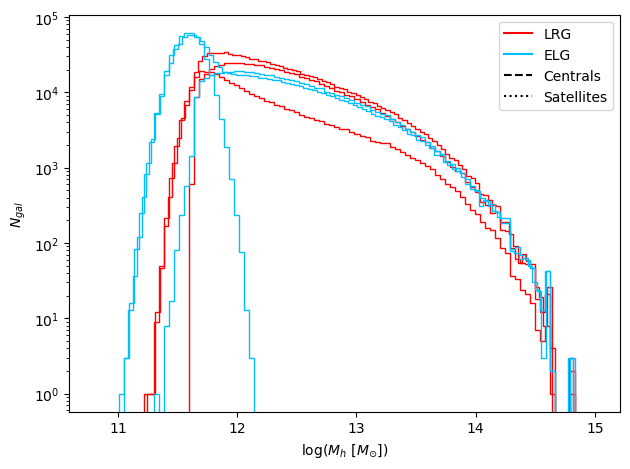

In [20]:
#Plot Halo mass function 

HOD_obj.plot_HMF(cats, show_sat=True)


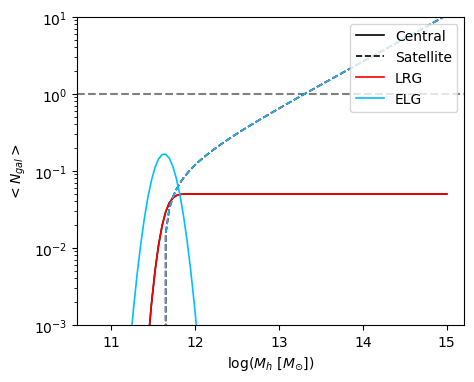

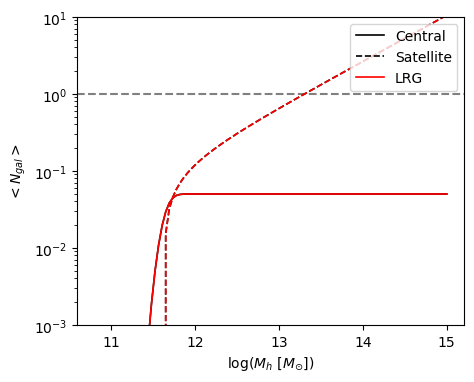

In [21]:
#Plot HOD model
HOD_obj.HOD_plot()
HOD_obj.HOD_plot(tracer='LRG')


In [22]:
# 2PCF settings 
HOD_obj.args['2PCF_settings'] # if edges_rppi/smu are None it will take the rp_min/max 

{'rsd': True,
 'bin_logscale': True,
 'mu_max': 1,
 'n_mu_bins': 101,
 'multipole_index': [0, 2],
 'n_r_bins': 25,
 'n_rp_bins': 25,
 'rmax': 30,
 'rmin': 0.01,
 'rp_max': 30,
 'rp_min': 0.01,
 'edges_rppi': None,
 'edges_smu': None,
 'los': 'z',
 'pimax': 40}

In [23]:
#compute clustering for 1 tracer, it apply rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')

#Computing wp for ELG...


#wp for ELG computed !time = 0.223 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 0.907 s


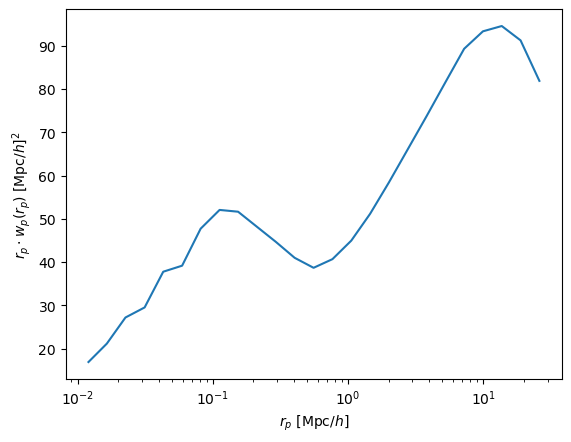

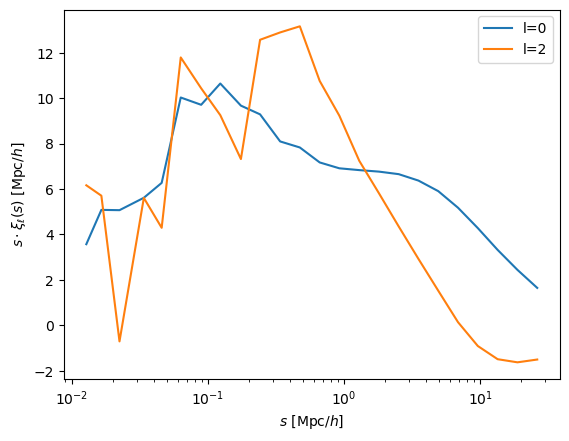

In [24]:
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [25]:
# Create galaxy mock catalog with different seed
import numpy as np 
cat_elg = [HOD_obj.make_mock_cat(fix_seed=ii, tracers='ELG') for ii in np.random.randint(0,2**32, size=10)]


Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 1.4398736953735352
Start satellite assignement


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../../../../../../../../../homes/a/arocher/.local/lib/python3.10/site-packages/HODDIES/utils.py", line 483:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


Satellite assignement done 2.8598804473876953
ELG mock catalogue done 3.169227123260498
1013873 central galaxies, 1184183 satellites, fraction of satellite 0.54 
Done overall time  ELG 5.066277265548706
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.5156605243682861
Start satellite assignement
Satellite assignement done 1.0227036476135254
ELG mock catalogue done 1.3755319118499756
1014306 central galaxies, 1186215 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.5327649116516113
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.3165411949157715
Start satellite assignement
Satellite assignement done 0.9682271480560303
ELG mock catalogue done 1.2779464721679688
1013679 central galaxies, 1185087 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.1428751945495605
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.28498005867004395
Start satellite assignement
Satellite assigne

#Computing wp for ELG...
#wp for ELG computed !time = 0.449 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.512 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.441 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.445 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.481 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.479 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.448 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.462 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.454 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.444 s


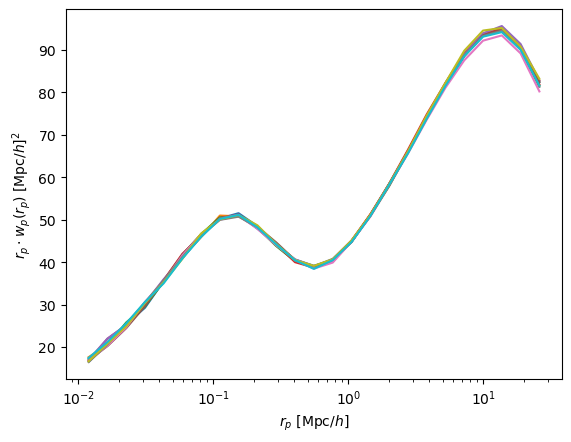

#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.421 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.423 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.410 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.420 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.388 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.639 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.480 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.475 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.365 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.305 s


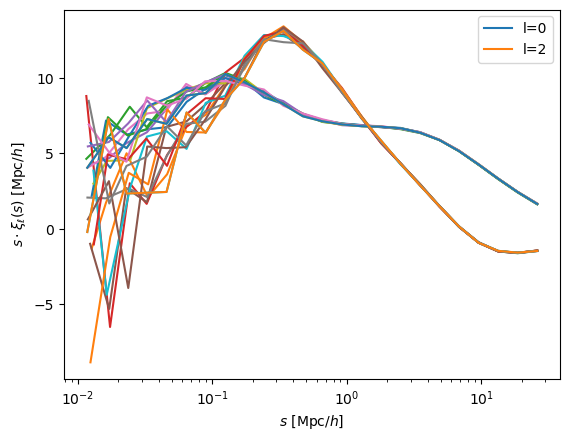

In [26]:
for cat in cat_elg:
    rp, wp = HOD_obj.get_wp(cat, tracers='ELG')
    plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()

for cat in cat_elg:
    s, xi = HOD_obj.get_2PCF(cat, tracers='ELG')
    plt.plot(s,s*xi[0])
    plt.plot(s,s*xi[1])
plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

# Use particles for satelittes instead of NFW

In [15]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml
HOD_obj.args['use_particles'] = True
HOD_obj.args['hcat']['load_particles'] = True

HOD_obj_part= HOD(args=HOD_obj.args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')


Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z1.100 ...
Done took 00:00:12
Compute columns...
Done took  00:00:00
AbacusSummit_highbase_c000_ph100 at 1.1 loaded, took 00:00:13


In [16]:
#First run need to compile jit functions
# If not enough particles are found, automatically switch to NFW
# Need lot of memory to run with particles, so it might no work with 2Gpc/h box
cats = HOD_obj_part.make_mock_cat(fix_seed=None) 
cats 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.3184084892272949
Start satellite assignement
Satellite assignement done 0.572068452835083
LRG mock catalogue done 0.7022840976715088
258864 central galaxies, 740958 satellites, fraction of satellite 0.74 
Done overall time  LRG 1.4925122261047363
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 1.605637550354004
Start satellite assignement
Satellite assignement done 0.42316412925720215
ELG mock catalogue done 0.5673253536224365
460017 central galaxies, 538336 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.998398542404175


Catalog(csize=1998175, size=1998175, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

In [17]:
#Second run is faster
cats = HOD_obj_part.make_mock_cat(fix_seed=None) 
cats 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.40048670768737793
Start satellite assignement
Satellite assignement done 0.5377755165100098
LRG mock catalogue done 0.6622276306152344
257812 central galaxies, 739121 satellites, fraction of satellite 0.74 
Done overall time  LRG 1.5204391479492188
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 1.6882917881011963
Start satellite assignement
Satellite assignement done 0.4170198440551758
ELG mock catalogue done 0.5431621074676514
460749 central galaxies, 537733 satellites, fraction of satellite 0.54 
Done overall time  ELG 3.1245791912078857


Catalog(csize=1995415, size=1995415, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

In [35]:
HOD_obj_part.get_crosswp(cats, tracers=['ELG', 'LRG'], verbose=True)

#Computing wp for ['ELG' 'ELG']...
#wp for ['ELG' 'ELG'] computed !time = 0.389 s
#Computing wp for ['ELG' 'LRG']...
#wp for ['ELG' 'LRG'] computed !time = 0.386 s
#Computing wp for ['LRG' 'LRG']...
#wp for ['LRG' 'LRG'] computed !time = 0.403 s


{'ELG_ELG': [array([1.19398650e-02, 1.64510848e-02, 2.26559838e-02, 3.11751783e-02,
         4.27930633e-02, 5.88814097e-02, 8.11857469e-02, 1.11651351e-01,
         1.53596143e-01, 2.11548103e-01, 2.92124963e-01, 4.03667506e-01,
         5.57551989e-01, 7.68447544e-01, 1.05926623e+00, 1.46004588e+00,
         2.01098996e+00, 2.77052121e+00, 3.81708506e+00, 5.25906130e+00,
         7.24412454e+00, 9.97985127e+00, 1.37487107e+01, 1.89405533e+01,
         2.60935734e+01]),
  array([6.01656230e+03, 4.88508579e+03, 3.98462336e+03, 3.10845507e+03,
         2.31592615e+03, 1.67976849e+03, 1.17063536e+03, 7.93145910e+02,
         4.94049861e+02, 2.87976680e+02, 1.70526579e+02, 1.07849399e+02,
         7.72856741e+01, 5.92709652e+01, 4.84082531e+01, 4.01321225e+01,
         3.27939492e+01, 2.69414818e+01, 2.18732165e+01, 1.74637334e+01,
         1.36956916e+01, 1.04015114e+01, 7.64257697e+00, 5.24554561e+00,
         3.42235358e+00])],
 'ELG_LRG': [array([1.19398650e-02, 1.64510848e-02, 2.2655